In [18]:
import pandas as pd
import numpy as np
import nltk
import future
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


from wordcloud import WordCloud
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup 
import re
import nltk
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

In [19]:
# Load csv file
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [20]:
df.shape

(413840, 6)

In [21]:
df1 = df.iloc[0:50000,:]
df2 = df.iloc[50000:100000,:]
df3 = df.iloc[100000:150000,:]
df4 = df.iloc[150000:200000,:]
df5 = df.iloc[200000:250000,:]
df6 = df.iloc[250000:300000,:]
df7 = df.iloc[300000:350000,:]
df8 = df.iloc[350000:,:]

In [22]:
df1.to_csv("1st-part.csv")

In [23]:
df2.to_csv("2nd-part.csv")

In [24]:
df3.to_csv("3rd-part.csv")

In [25]:
df4.to_csv("4th-part.csv")

In [26]:
df5.to_csv("5th-part.csv")

In [27]:
df6.to_csv("6th-part.csv")

In [28]:
df7.to_csv("7th-part.csv")

In [29]:
df8.to_csv("8th-part.csv")

In [30]:
df_c = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [31]:
df_c

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [32]:
print("\nTotal number of reviews: ",len(df))
print("\nTotal number of brands: ", len(list(set(df['Brand Name']))))
print("\nTotal number of unique products: ", len(list(set(df['Product Name']))))


Total number of reviews:  413840

Total number of brands:  385

Total number of unique products:  4410


In [33]:
def label_data():
    rows = pd.read_csv('Amazon_Unlocked_Mobile.csv', header=0, index_col=False, delimiter=',')
    labels = []
    for cell in rows['Rating']:
        if cell >= 4:
            labels.append('2')  #Good
        elif cell == 3:
            labels.append('1')   #Neutral
        else:
            labels.append('0')   #Poor
            
    rows['Label'] = labels
    del rows['Review Votes']
    return rows

In [34]:
def clean_data(data):
    
    #replace blank values in all the cells with 'nan'
    df.replace('',np.nan,inplace=True)
    #delete all the rows which contain at least one cell with nan value
    df.dropna(axis=0, how='any', inplace=True)
    
    #save output csv file
    df.to_csv('labelled_dataset.csv', index=False)
    return data
clean_data(df)
df = pd.read_csv('labelled_dataset.csv')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [36]:
l = df["Rating"].values

In [40]:
print(list(l).count(0))
print(list(l).count(1))
print(list(l).count(2))
print(list(l).count(3))
print(list(l).count(4))
print(list(l).count(5))

0
57535
20068
26058
50421
180253


In [45]:
list(l).count(1)+list(l).count(2)

77603

In [46]:
list(l).count(3)

26058

In [47]:
list(l).count(4) + list(l).count(5)

230674

In [ ]:
df3 =pd.DataFrame([["Positive",230674],["Neutral",26058],["Negative",77603]],columns= ["Polarity","Frequency"])

In [19]:
df = df.sample(frac=0.1, random_state=0) #uncomment to use full set of data

# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['Sentiment'] = np.where(df['Rating'] > 3, 1, 0)
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
329602,Verizon Motorola RAZR V3m GPS 3G Camera Cell P...,Motorola,13.33,4,Replacement for my husband's old one just like...,0.0,1
161470,HTC One M7 32GB Unlocked GSM 4G LTE Android Ce...,HTC,133.95,5,Excellent! Love it,0.0,1
178313,LG G Vista 4G Unlocked 4G LTE Android 8MP Came...,LG,99.99,4,So far it has been a good phone.,0.0,1
100605,BLU Life 8 XL Smartphone - Unlocked - Global G...,BLU,2000.00,4,"Not a shill. Swear.Anywho, bought this for my ...",1.0,1
221641,Nokia Lumia 635 8GB Unlocked GSM 4G LTE Window...,Nokia,99.95,1,It clearly stated the phone was unlocked. It i...,0.0,0


In [20]:
df["Reviews"].iloc[0]

"Replacement for my husband's old one just like it! He loves it!"

In [21]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [22]:
# Split data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Sentiment'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])

Load 27735 training examples and 3082 validation examples. 

Show a review in the training set : 
 This phone stop working


In [23]:
# Preprocess text data in training set and validation set
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[11])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 love my outterbox was everything i heard it to be


In [24]:
# Split review text into parsed sentences uisng NLTK's punkt tokenizer
# nltk.download()
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parse each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[2])




27691 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['lovely', 'first', 'iphone', 'for', 'me', 'great', 'service']


In [25]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

Number of features : 5988 

Show some feature names : 
 ['00', 'charged', 'factory', 'lie', 'primarily', 'states']


LogisticRegression()

In [26]:
X_test_cleaned[0]

'cool'

In [27]:
# Look at the top 10 features with smallest and the largest coefficients
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['not' 'disappointed' 'never' 'horrible' 'worst' 'poor' 'waste' 'doesn'
 'return' 'stopped']

Top 10 features with largest coefficients : 
['great' 'love' 'excellent' 'perfect' 'best' 'good' 'awesome' 'easy'
 'excelente' 'amazing']


In [28]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [29]:
# Evaluate on the validaton set
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9322

AUC score : 0.8987

Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       763
           1       0.95      0.97      0.96      2319

    accuracy                           0.93      3082
   macro avg       0.92      0.90      0.91      3082
weighted avg       0.93      0.93      0.93      3082


Confusion Matrix : 
 [[ 635  128]
 [  81 2238]]


In [30]:
import pickle

with open('tfidf.pkl', 'wb') as th:
    pickle.dump(tfidf, th)


with open('lr.pkl', 'wb') as lh:
    pickle.dump(lr, lh)
    


In [31]:
# # Building a pipeline
# estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
# model = Pipeline(estimators)


# # Grid search
# params = {"lr__C":[0.1, 1, 10], #regularization param of logistic regression
#           "tfidf__min_df": [1, 3], #min count of words 
#           "tfidf__max_features": [1000, None], #max features
#           "tfidf__ngram_range": [(1,1), (1,2)], #1-grams or 2-grams
#           "tfidf__stop_words": [None, "english"]} #use stopwords or don't

# grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
# grid.fit(X_train_cleaned, y_train)
# print("The best paramenter set is : \n", grid.best_params_)


# # Evaluate on the validaton set
# predictions = grid.predict(X_test_cleaned)
# modelEvaluation(predictions)

In [32]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
329602,Verizon Motorola RAZR V3m GPS 3G Camera Cell P...,Motorola,13.33,4,Replacement for my husband's old one just like...,0.0,1
161470,HTC One M7 32GB Unlocked GSM 4G LTE Android Ce...,HTC,133.95,5,Excellent! Love it,0.0,1
178313,LG G Vista 4G Unlocked 4G LTE Android 8MP Came...,LG,99.99,4,So far it has been a good phone.,0.0,1
100605,BLU Life 8 XL Smartphone - Unlocked - Global G...,BLU,2000.00,4,"Not a shill. Swear.Anywho, bought this for my ...",1.0,1
221641,Nokia Lumia 635 8GB Unlocked GSM 4G LTE Window...,Nokia,99.95,1,It clearly stated the phone was unlocked. It i...,0.0,0
...,...,...,...,...,...,...,...
245519,POSH MOBILE TITAN PRO HD ANDROID GSM UNLOCKED ...,Posh Mobile,97.99,2,It eats up battery its also eats away data I b...,0.0,0
229017,Otium Gear S Bluetooth Smart Watch WristWatch ...,Otium,51.99,1,Wrong color received stainless and black. Had ...,0.0,0
136600,"BLU WIN JR - 4.0"" Windows Smartphone - Global ...",BLU,59.99,4,Item was bought as a gift to a friend who live...,0.0,1
19205,Apple iPhone 5C 16GB White - Unlocked Cell Phones,Apple,135.00,1,Not even 4 months into owning this phone has i...,0.0,0


Text(0, 0.5, 'Count')

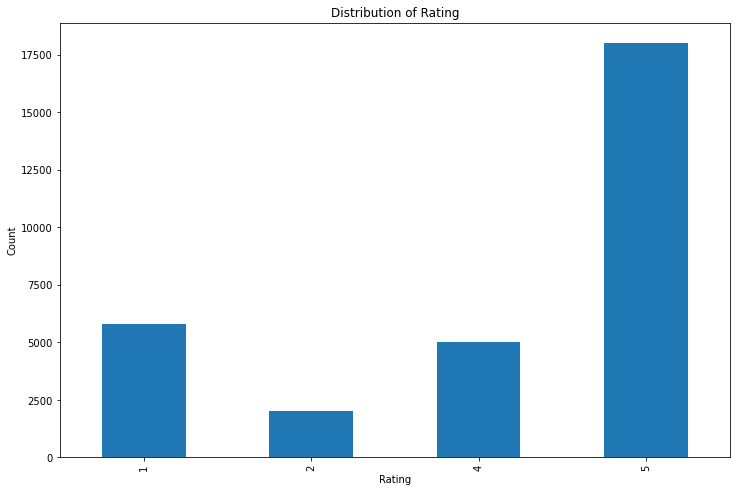

In [33]:
# Plot distribution of rating
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
x = df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

In [34]:
x = df['Rating'].value_counts()

In [35]:
x

5    17998
1     5787
4     5009
2     2023
Name: Rating, dtype: int64

In [36]:
df1 = pd.DataFrame(data = [[1,5787],[2,2023],[4,5009],[5,17998]],columns = ["Count","Rating"])

In [37]:
brands = df["Brand Name"].value_counts()
b = brands.to_frame()
b = b.reset_index()

In [38]:
b = b.iloc[0:20,:]

In [39]:
b.columns = ["Brand Name","Number of Reviews"]

In [40]:
b

,Brand Name,Number of Reviews
0,Samsung,5892
1,BLU,5411
2,Apple,5388
3,LG,1943
4,BlackBerry,1506
5,Nokia,1469
6,Motorola,1177
7,HTC,1153
8,CNPGD,1038
9,OtterBox,774


In [41]:
type(brands)

pandas.core.series.Series

Text(0.5, 1.0, 'Number of Reviews for Top 20 Brands')

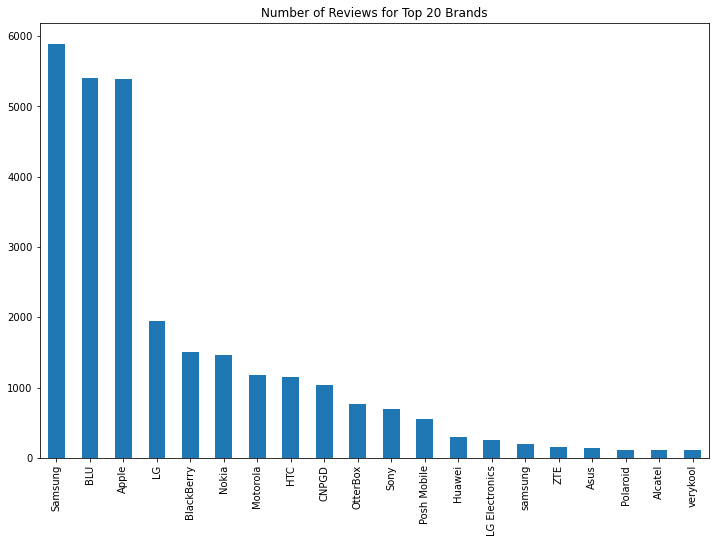

In [42]:
# Plot number of reviews for top 20 brands
brands = df["Brand Name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")

Text(0.5, 1.0, 'Number of Reviews for Top 50 Brands')

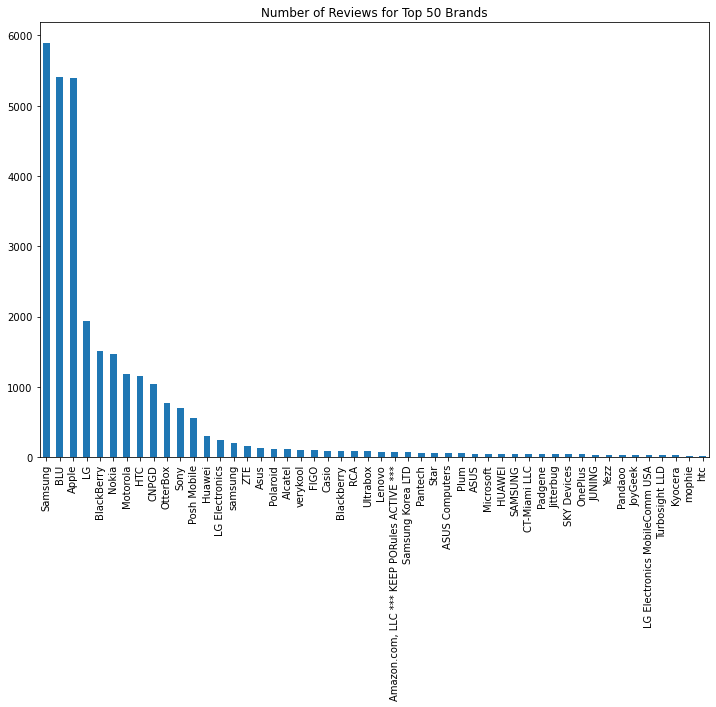

In [43]:
# Plot number of reviews for top 50 brands
brands = df["Brand Name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[:50].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Brands")

Text(0.5, 1.0, 'Number of Reviews for Top 20 products')

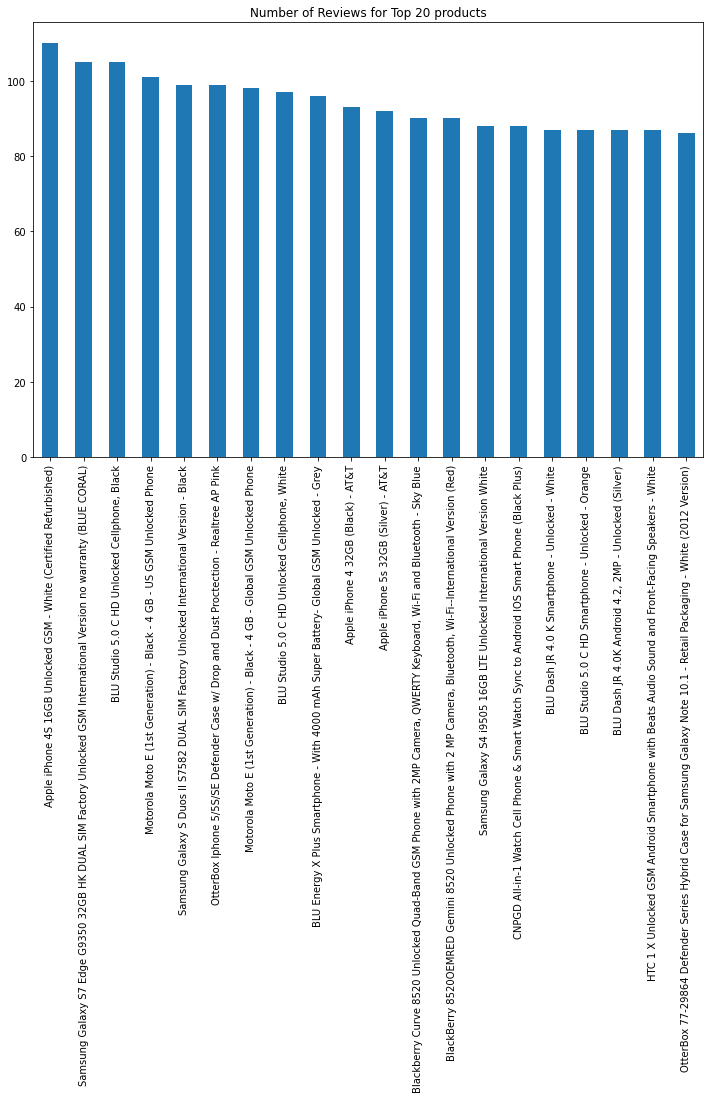

In [44]:
# Plot number of reviews for top 20 products
products = df["Product Name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
products[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 products")

Text(0, 0.5, 'Count')

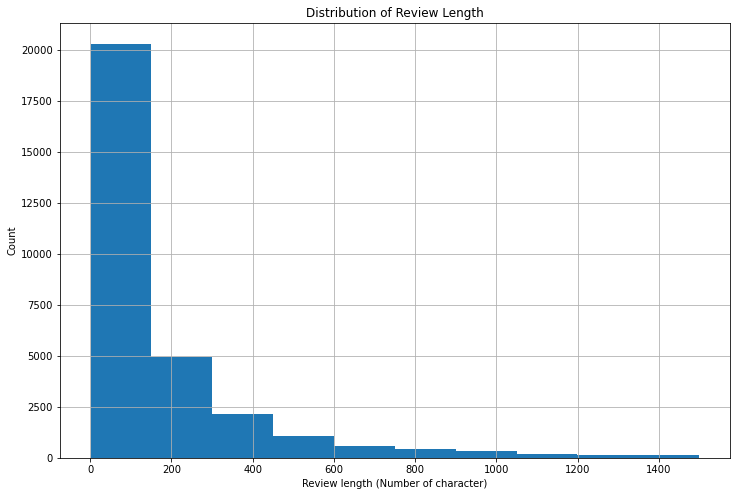

In [45]:
# Plot distribution of review length
review_length = df["Reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [46]:
review_length = df["Reviews"].dropna().map(lambda x: len(x))
df["lenght"] = review_length 

In [47]:


def create_word_cloud(brand, sentiment):
    try: 
        df_brand = df.loc[df['Brand Name'].isin([brand])]
        df_brand_sample = df_brand.sample(frac=0.1)
        word_cloud_collection = ''
        
        if sentiment == 1:
            df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==1]["Reviews"]
            
        if sentiment == 0:
            df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==0]["Reviews"]
            
        for val in df_reviews.str.lower():
            tokens = nltk.word_tokenize(val)
            tokens = [word for word in tokens if word not in stopwords.words('english')]
            for words in tokens:
                word_cloud_collection = word_cloud_collection + words + ' '

        wordcloud = WordCloud(max_font_size=50,background_color='white', width=500, height=300).generate(word_cloud_collection)
        plt.figure(figsize=(10,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
    except: 
        pass

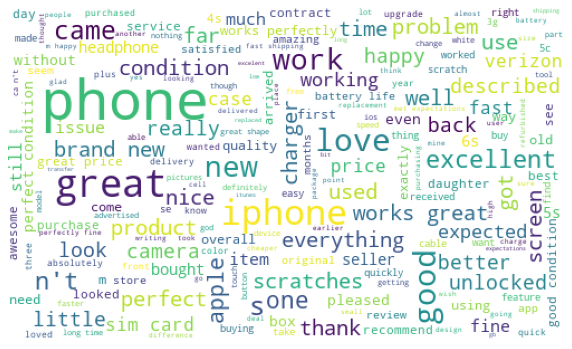

In [48]:
create_word_cloud(brand='Apple', sentiment=1)